In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
import random
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.impute import SimpleImputer

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv(r'/content/drive/MyDrive/fake_or_real_news.csv')

In [5]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
data.shape

(6335, 4)

In [7]:
#Check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [8]:
data = data.drop(columns=['Unnamed: 0'])
data

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [9]:
data['content'] = data.apply(lambda x: '-'.join([str(x['title']), str(x['text'])]), axis=1)

In [10]:
data

,title,text,label,content
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear-Daniel Greenfield...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy-U....
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...
...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,State Department says it can't find emails fro...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,Anti-Trump Protesters Are Tools of the Oligarc...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,"In Ethiopia, Obama seeks progress on peace, se..."


In [11]:
data = data.drop(columns=['title',"text"])
data

,label,content
0,FAKE,You Can Smell Hillary’s Fear-Daniel Greenfield...
1,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,REAL,Kerry to go to Paris in gesture of sympathy-U....
3,FAKE,Bernie supporters on Twitter erupt in anger ag...
4,REAL,The Battle of New York: Why This Primary Matte...
...,...,...
6330,REAL,State Department says it can't find emails fro...
6331,FAKE,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,FAKE,Anti-Trump Protesters Are Tools of the Oligarc...
6333,REAL,"In Ethiopia, Obama seeks progress on peace, se..."


In [12]:
#Check the missing values in the data
data.isnull().sum()

label      0
content    0
dtype: int64

In [13]:
data['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [14]:
sentiment = data['label'].value_counts().reset_index()
sentiment

,label,count
0,REAL,3171
1,FAKE,3164


<ipython-input-17-7796857f8687>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sentiment['label'], x=sentiment['count'], palette='cool')


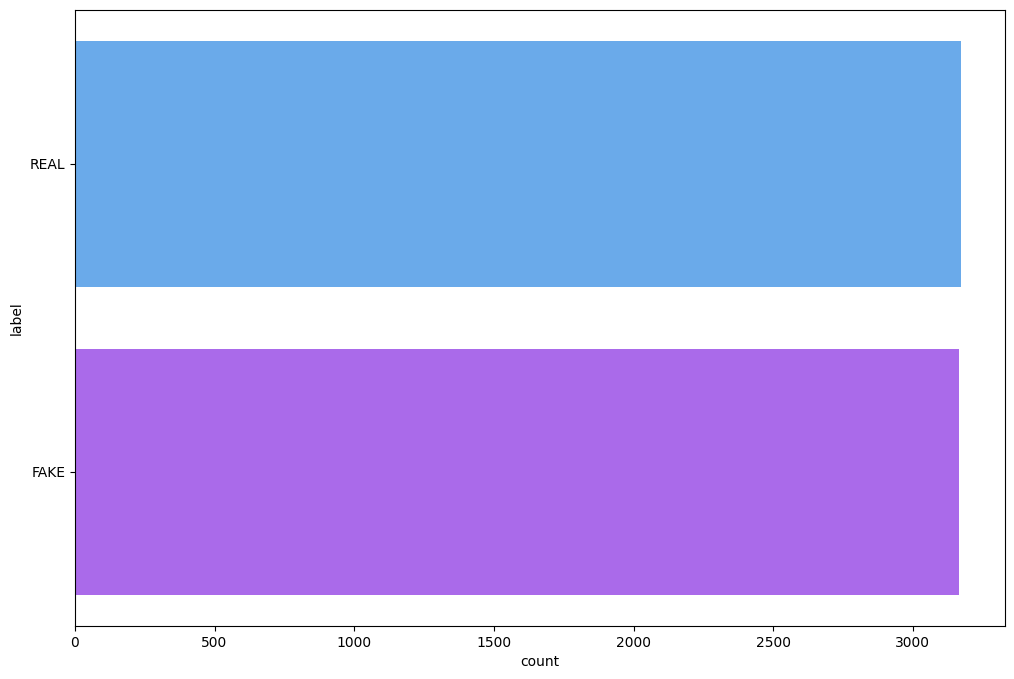

In [17]:
sentiment = data['label'].value_counts().reset_index(name='count')

plt.figure(figsize=(12,8))
sns.barplot(y=sentiment['label'], x=sentiment['count'], palette='cool')
plt.show()

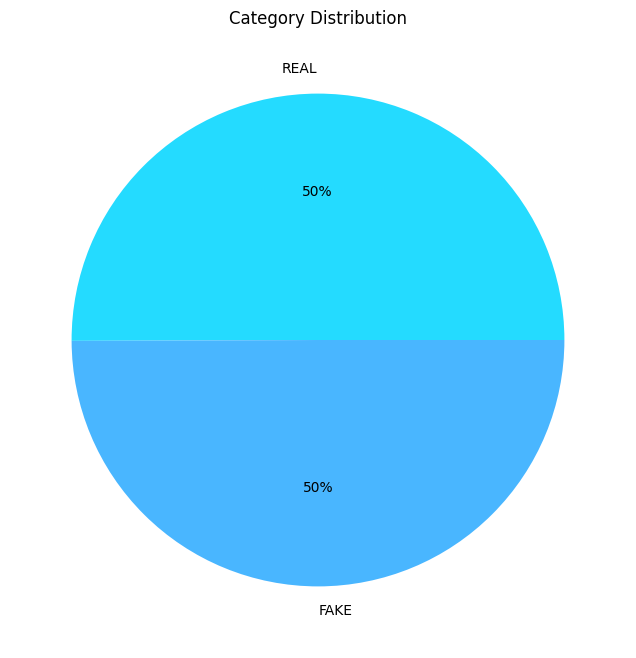

In [19]:
plt.figure(figsize=(12,8))
plt.pie(sentiment['count'], labels=sentiment['label'],  # Use 'label' for labels
        colors=sns.color_palette('cool'), autopct='%.0f%%')
plt.title('Category Distribution')
plt.show()

In [20]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [21]:
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [22]:
data['content'].head(5)

0    You Can Smell Hillary’s Fear-Daniel Greenfield...
1    Watch The Exact Moment Paul Ryan Committed Pol...
2    Kerry to go to Paris in gesture of sympathy-U....
3    Bernie supporters on Twitter erupt in anger ag...
4    The Battle of New York: Why This Primary Matte...
Name: content, dtype: object

In [23]:
print("printing some random reviews")
print(9, data['content'].values[9])
print(34, data['content'].values[34])
print(147, data['content'].values[147])

printing some random reviews
9 Iran reportedly makes new push for uranium concessions in nuclear talks-Iranian negotiators reportedly have made a last-ditch push for more concessions from the U.S. and five other world powers as talks on the fate of Iran's nuclear program come down to the final days before a crucial deadline.

The New York Times reported late Sunday that Tehran had backed away from a tentative promise to ship a large portion of its uranium stockpile to Russia, where it could not be used as part of any future weapons program. Western officials insisted to the paper that the uranium did not have to be sent overseas, but could be disposed of in other ways.

The new twist in the talks comes just two days before the deadline for both sides to agree on a framework for a permanent deal. The final deadline for a permanent deal would not arrive until the end of June.

However, if Iran insists on keeping its uranium in the country, it would undermine a key argument made in favor 

In [24]:
# Combining all the above stundents
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [25]:
preprocessed_text = preprocess_text(data['content'].values)

100%|██████████| 6335/6335 [00:15<00:00, 407.17it/s]


In [26]:
print("printing some random reviews")
print(9, preprocessed_text[9])
print(34, preprocessed_text[34])
print(147, preprocessed_text[147])

printing some random reviews
9 iran reportedly makes new push uranium concessions nuclear talks iranian negotiators reportedly made last ditch push concessions u five world powers talks fate iran nuclear program come final days crucial deadline new york times reported late sunday tehran backed away tentative promise ship large portion uranium stockpile russia could not used part future weapons program western officials insisted paper uranium not sent overseas could disposed ways new twist talks comes two days deadline sides agree framework permanent deal final deadline permanent deal would not arrive end june however iran insists keeping uranium country would undermine key argument made favor deal obama administration times reports uranium gone russia would converted fuel rods difficult use nuclear weapons not clear would happen uranium remained iran associated press reported sunday iran position shifted demanding allowed keep nearly 10 000 centrifuges enriching uranium agreeing keep 6

In [27]:
data["label"] = [1 if i == "REAL" else 0 for i in data["label"]]
data.head(10)

,label,content
0,0,You Can Smell Hillary’s Fear-Daniel Greenfield...
1,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,1,Kerry to go to Paris in gesture of sympathy-U....
3,0,Bernie supporters on Twitter erupt in anger ag...
4,1,The Battle of New York: Why This Primary Matte...
5,0,"Tehran, USA- \nI’m not an immigrant, but my g..."
6,0,Girl Horrified At What She Watches Boyfriend D...
7,1,‘Britain’s Schindler’ Dies at 106-A Czech stoc...
8,1,Fact check: Trump and Clinton at the 'commande...
9,1,Iran reportedly makes new push for uranium con...


Text(0.5, 1.0, 'Real Word Cloud')

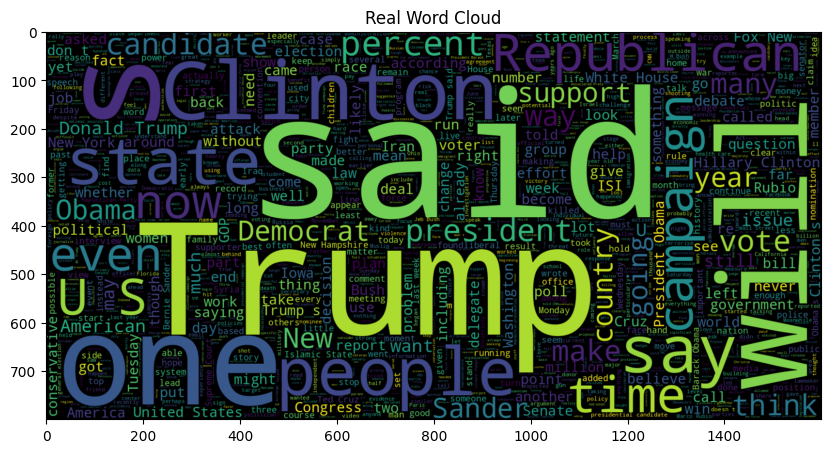

In [28]:
#Real word cloud
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
wc=WordCloud(max_words=2000,width=1600,height=800).generate(' '.join(data[data.label==1].content))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Real Word Cloud")

Text(0.5, 1.0, 'Fake Word Cloud')

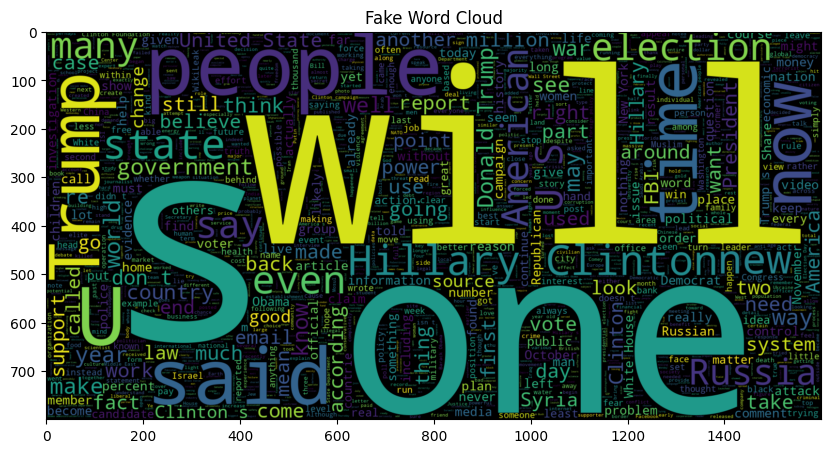

In [29]:
#Fake word cloud
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
wc=WordCloud(max_words=2000,width=1600,height=800).generate(' '.join(data[data.label==0].content))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Fake Word Cloud")

In [30]:
y=np.array(data['label'])

In [31]:
from sklearn.model_selection import train_test_split
#Breaking into Train and test
X_train, X_test, y_train, y_test = train_test_split(preprocessed_text, y, test_size=0.3,stratify=y ,random_state=42)

In [32]:
import pickle

In [34]:
from sklearn import preprocessing

count_vect = CountVectorizer()
count_trans = count_vect.fit(X_train) # fit has to happen only on train data

# Dump the file
pickle.dump(count_trans, open(r"/content/drive/count_vect.pkl", "wb"))


# Testing phase
count = pickle.load(open(r"/content/drive/count_vect.pkl", 'rb'))

# we use the fitted CountVectorizer to convert the text to vector
X_train_count =count.transform(X_train)
X_test_count = count.transform(X_test)

#Normalize Data
X_train_count = preprocessing.normalize(X_train_count)
print("Train Data Size: ",X_train_count.shape)

#Normalize Data
X_test_count = preprocessing.normalize(X_test_count)
print("Test Data Size: ",X_test_count.shape)

OSError: [Errno 95] Operation not supported: '/content/drive/count_vect.pkl'

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]

param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='accuracy',n_jobs=-1,cv=3)
model.fit(X_train_count,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal n_estimators 120
optimal max_depth 100


In [ ]:
optimal_max_depth = model.best_estimator_.max_depth
optimal_n_estimators = model.best_estimator_.n_estimators

Accuracy on Test data is 0.9042609153077328
Accuracy on Train data is 0.9995489400090212
---------------------------


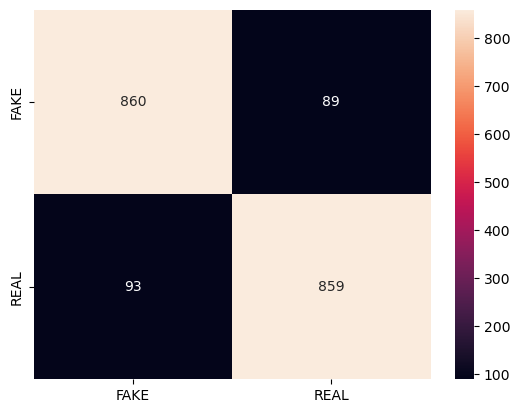

In [ ]:
clf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators = optimal_n_estimators)
clf.fit(X_train_count,y_train)

import pickle
filename = r'C:\Users\Lenovo\Music\FAKE NEWS\Dataset\rf.pkl'
pickle.dump(clf, open(filename, 'wb'))

pred_test =clf.predict(X_test_count)
test_accuracy = accuracy_score(y_test, pred_test)
pred_train = clf.predict(X_train_count)
train_accuracy =accuracy_score(y_train,pred_train)

print("Accuracy on Test data is " +str(test_accuracy))
print("Accuracy on Train data is "+str(train_accuracy))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['FAKE','REAL']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

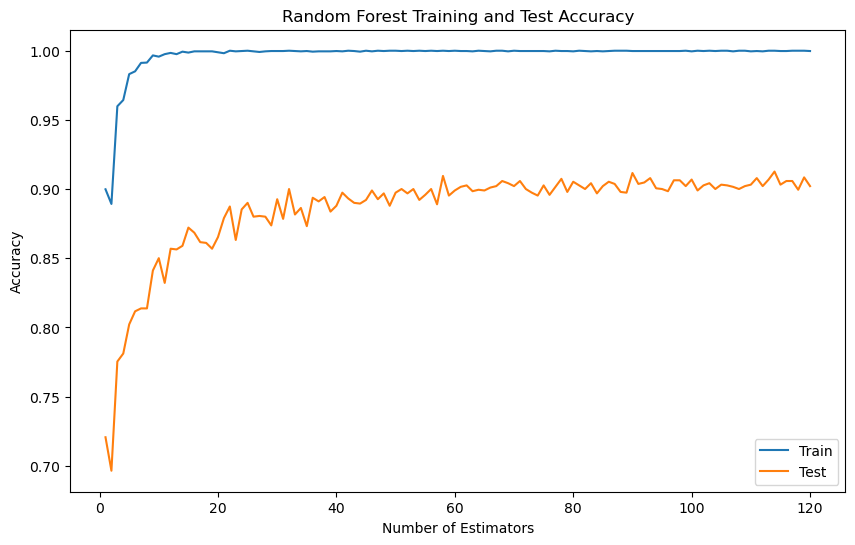

In [ ]:
# Training and test accuracy curves
train_accuracies = []
test_accuracies = []
estimators_range = range(1, optimal_n_estimators + 1)  # Adjust range if necessary

for n_estimators in estimators_range:
    clf = RandomForestClassifier(max_depth=optimal_max_depth, n_estimators=n_estimators)
    clf.fit(X_train_count, y_train)

    train_pred = clf.predict(X_train_count)
    test_pred = clf.predict(X_test_count)

    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the training and test accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, train_accuracies, label='Train')
plt.plot(estimators_range, test_accuracies, label='Test')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Training and Test Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
class_names = ['FAKE','REAL']
print("Classification Report:")
print(classification_report(y_test, pred_test, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.90      0.91      0.90       949
        REAL       0.91      0.90      0.90       952

    accuracy                           0.90      1901
   macro avg       0.90      0.90      0.90      1901
weighted avg       0.90      0.90      0.90      1901



In [ ]:
original =  ["REAL" if x==1 else "FAKE" for x in y_test[:20]]
predicted = clf.predict(X_test_count[:20])
pred = []

for i in predicted:
  if i == 1:
    k = "REAL"

    pred.append(k)
  else:
    k = "FAKE"
    pred.append(k)
# Creating a data frame
df = pd.DataFrame(list(zip(X_test[:20],original, pred,)),
               columns =['content','original_Classlabel', 'predicted_classlebel'])
df

,content,original_Classlabel,predicted_classlebel
0,radio derb transcript october 21 magic bricks ...,FAKE,FAKE
1,reproductive rights hang balance debate modera...,REAL,REAL
2,public funding elections makes politics even p...,REAL,REAL
3,debate moderators missed opportunity ask real ...,REAL,REAL
4,10 things trump could probably not change win ...,REAL,REAL
5,8 classic football banners time next swipe lef...,FAKE,FAKE
6,3 years suffering 19 year old girl dies gardas...,FAKE,FAKE
7,paul ryan miffed new budget deal budget deal c...,REAL,REAL
8,western lynch mob russia ties absurd anots inf...,FAKE,FAKE
9,saturn baffling hexagon raging storm four time...,FAKE,FAKE


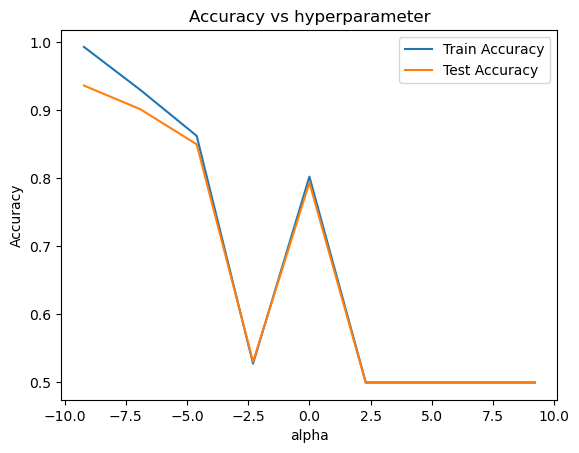

optimal alpha for which auc is maximum :  0.0001


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import math

alpha = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]

train_auc = []
test_auc = []

for i in alpha:
    model = SGDClassifier(alpha=i, loss = "hinge")
    model.fit(X_train_count,y_train)
    prob_cv = model.predict(X_test_count)
    test_auc.append(accuracy_score(y_test,prob_cv))
    prob_train = model.predict(X_train_count)
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_alpha= alpha[test_auc.index(max(test_auc))]
alpha=[math.log(x) for x in alpha]

#plot auc vs alpha
x = plt.subplot( )
x.plot(alpha, train_auc, label='Train Accuracy')
x.plot(alpha, test_auc, label='Test Accuracy')
plt.title('Accuracy vs hyperparameter')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_alpha)

Accuracy for Test data is 0.9363492898474487
Accuracy for Train data is 0.992106450157871
---------------------------


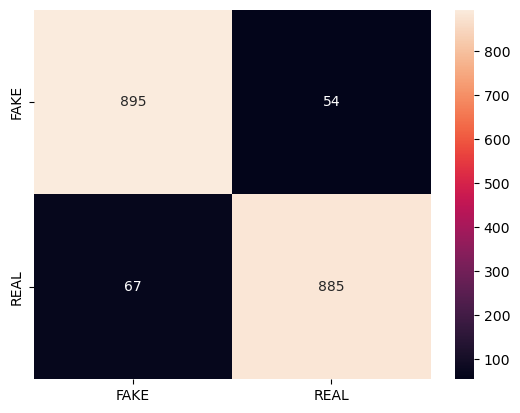

In [ ]:
#Testing AUC on Test data
svm = SGDClassifier(alpha=optimal_alpha)

svm.fit(X_train_count,y_train)

filename = r'C:\Users\Lenovo\Music\FAKE NEWS\Dataset/svm.pkl'
pickle.dump(svm, open(filename, 'wb'))

pred_test = svm.predict(X_test_count)
test_accuracy = accuracy_score(y_test, pred_test)
pred_train = svm.predict(X_train_count)
train_accuracy = accuracy_score(y_train,pred_train)

print("Accuracy for Test data is " +str(test_accuracy))
print("Accuracy for Train data is " +str(train_accuracy))

print("---------------------------")

# Code for drawing seaborn heatmaps
from sklearn.metrics import confusion_matrix
class_names = ['FAKE','REAL']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
class_names = ['FAKE','REAL']
print("Classification Report:")
print(classification_report(y_test, pred_test, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.93      0.94      0.94       949
        REAL       0.94      0.93      0.94       952

    accuracy                           0.94      1901
   macro avg       0.94      0.94      0.94      1901
weighted avg       0.94      0.94      0.94      1901



In [ ]:
original =  ["REAL" if x==1 else "FAKE" for x in y_test[:20]]
predicted = clf.predict(X_test_count[:20])
pred = []

for i in predicted:
  if i == 1:
    k = "REAL"

    pred.append(k)
  else:
    k = "FAKE"
    pred.append(k)
# Creating a data frame
df = pd.DataFrame(list(zip(X_test[:20],original, pred,)),
               columns =['content','original_Classlabel', 'predicted_classlebel'])
df

,content,original_Classlabel,predicted_classlebel
0,radio derb transcript october 21 magic bricks ...,FAKE,FAKE
1,reproductive rights hang balance debate modera...,REAL,REAL
2,public funding elections makes politics even p...,REAL,REAL
3,debate moderators missed opportunity ask real ...,REAL,REAL
4,10 things trump could probably not change win ...,REAL,REAL
5,8 classic football banners time next swipe lef...,FAKE,FAKE
6,3 years suffering 19 year old girl dies gardas...,FAKE,FAKE
7,paul ryan miffed new budget deal budget deal c...,REAL,REAL
8,western lynch mob russia ties absurd anots inf...,FAKE,FAKE
9,saturn baffling hexagon raging storm four time...,FAKE,FAKE
